In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Preparation des données
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [6]:
# Étape pré-traitement et nettoyage des données

In [7]:
# 1. Vérifier les valeurs manquantes
df.isnull().sum() # Pas de valeurs manquantes

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [8]:
# 2. Supprimer ou gérer les doublons
df.duplicated().sum() # Pas de données dupliquées 

np.int64(0)

In [9]:
# 3. Vérifier les types des colonnes
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df['release_date'].isnull().sum())  # voir combien de NaT après conversion


119798


In [10]:
df = df.drop(columns=['release_date']) # Colonne inutile (Suppression)


In [11]:
df['explicit'] = df['explicit'].astype(bool)
df['mode'] = df['mode'].astype(bool)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  bool   
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  bool   
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  speechiness       17

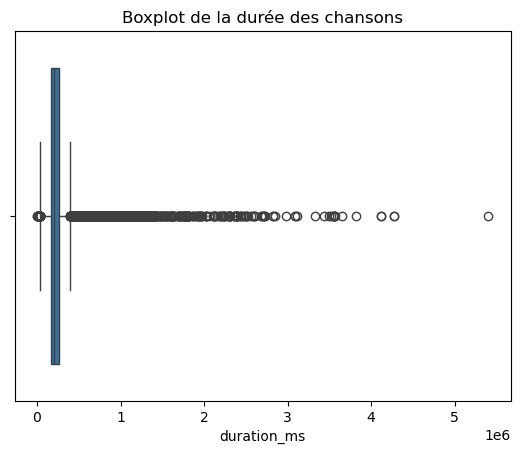

In [13]:
# 4. Rechercher les valeurs aberrantes

sns.boxplot(data=df, x='duration_ms')
plt.title("Boxplot de la durée des chansons")
plt.show()

In [14]:
# Capping des valeurs extrêmes (1er et 99e percentile)
q_low = df['duration_ms'].quantile(0.01)
q_high = df['duration_ms'].quantile(0.99)

df['duration_ms_capped'] = df['duration_ms'].clip(lower=q_low, upper=q_high)


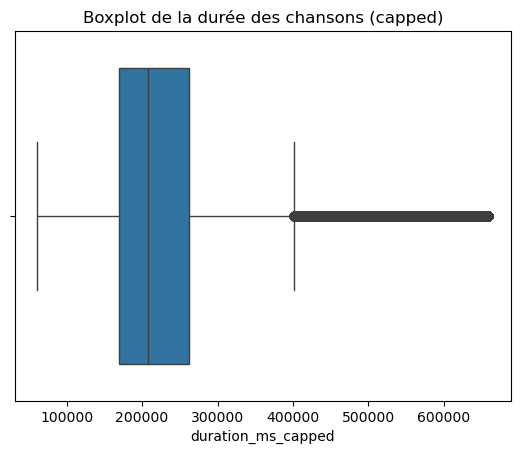

In [15]:

sns.boxplot(data=df, x='duration_ms_capped')
plt.title("Boxplot de la durée des chansons (capped)")
plt.show()


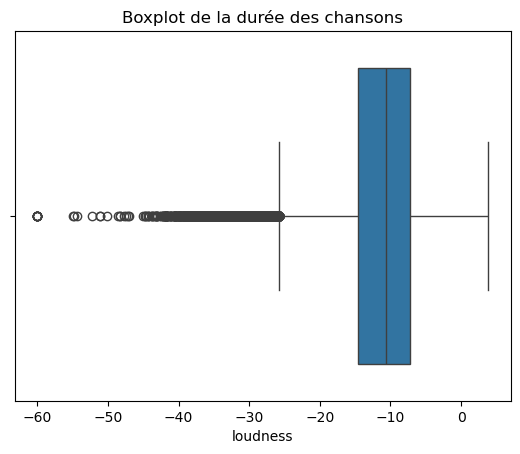

In [16]:
sns.boxplot(data=df, x='loudness')
plt.title("Boxplot de la durée des chansons")
plt.show()


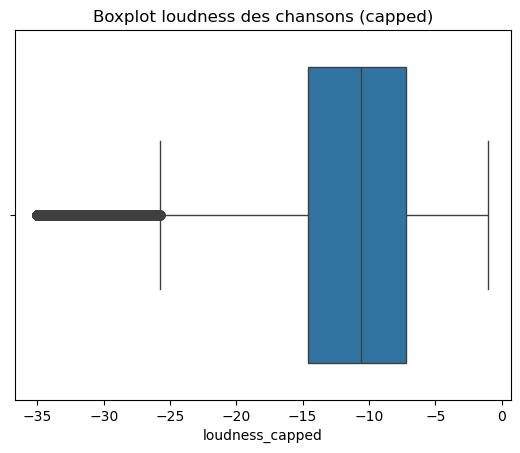

In [17]:
df['loudness_capped'] = df['loudness'].clip(lower=-35, upper=-1)
sns.boxplot(data=df, x='loudness_capped')
plt.title("Boxplot loudness des chansons (capped)")
plt.show()


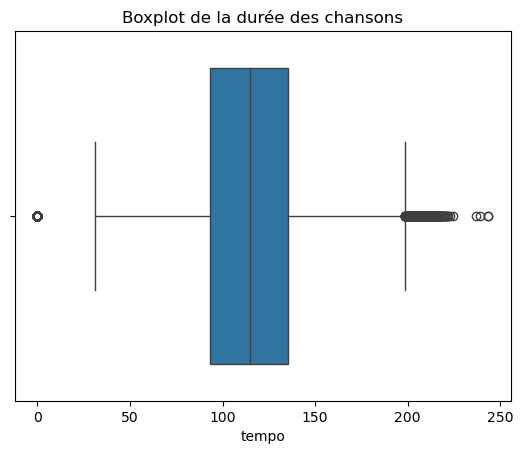

In [18]:
sns.boxplot(data=df, x='tempo')
plt.title("Boxplot de la durée des chansons")
plt.show()

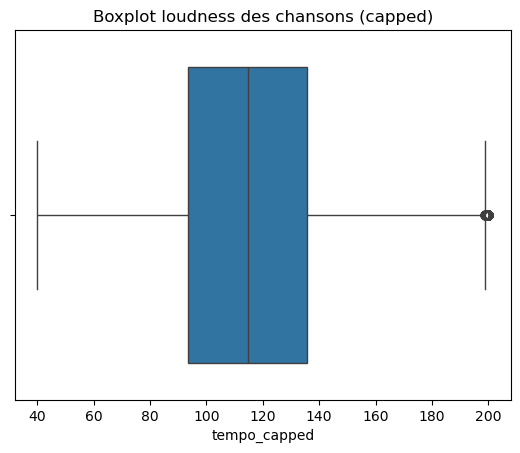

In [19]:
# Capping pour tempo : raisonnable entre 40 et 200 bpm
df['tempo_capped'] = df['tempo'].clip(lower=40, upper=200)

sns.boxplot(data=df, x='tempo_capped')
plt.title("Boxplot loudness des chansons (capped)")
plt.show()

In [20]:
df = df.drop(columns=['duration_ms', 'loudness', 'tempo'])
df.describe()

,valence,year,acousticness,danceability,energy,instrumentalness,key,liveness,popularity,speechiness,duration_ms_capped,loudness_capped,tempo_capped
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,0.482389,0.167010,5.199844,0.205839,31.431794,0.098393,227751.139423,-11.459604,116.857567
std,0.263171,25.917853,0.376032,0.176138,0.267646,0.313475,3.515094,0.174805,21.826615,0.162740,96961.280760,5.652832,30.488910
min,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61360.000000,-35.000000,40.000000
25%,0.317000,1956.000000,0.102000,0.415000,0.255000,0.000000,2.000000,0.098800,11.000000,0.034900,169827.000000,-14.615000,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,0.471000,0.000216,5.000000,0.136000,33.000000,0.045000,207467.000000,-10.580000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,0.703000,0.102000,8.000000,0.261000,48.000000,0.075600,262400.000000,-7.183000,135.537000
max,1.000000,2020.000000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,100.000000,0.970000,658839.840000,-1.000000,200.000000


In [21]:
# 5. Uniformiser les données catégoriques
df['artists'].unique()

array(["['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']",
       "['Dennis Day']",
       "['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat']", ...,
       "['Najma Wallin']",
       "['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna', 'J Balvin']",
       "['KEVVO', 'J Balvin']"], dtype=object)

In [22]:
# Mettre en minuscules
df['artists'] = df['artists'].str.lower()

# Enlever les espaces avant/après
df['artists'] = df['artists'].str.strip()

In [23]:
df['artists'].unique()

array(["['sergei rachmaninoff', 'james levine', 'berliner philharmoniker']",
       "['dennis day']",
       "['khp kridhamardawa karaton ngayogyakarta hadiningrat']", ...,
       "['najma wallin']",
       "['anuel aa', 'daddy yankee', 'karol g', 'ozuna', 'j balvin']",
       "['kevvo', 'j balvin']"], dtype=object)

In [24]:
df = df.drop(columns=['id', 'name'])

In [25]:
df.duplicated().sum()

np.int64(630)

In [26]:
df = df.drop_duplicates()


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.describe()

,valence,year,acousticness,danceability,energy,instrumentalness,key,liveness,popularity,speechiness,duration_ms_capped,loudness_capped,tempo_capped
count,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000,170023.000000
mean,0.529221,1976.888603,0.500756,0.537855,0.483230,0.165641,5.199497,0.205907,31.536263,0.098535,227786.444328,-11.436681,116.895730
std,0.262950,25.868619,0.375687,0.176013,0.267402,0.312281,3.514990,0.174886,21.784794,0.162984,96769.256446,5.633023,30.477696
min,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61360.000000,-35.000000,40.000000
25%,0.318000,1956.000000,0.101000,0.416000,0.256000,0.000000,2.000000,0.098700,12.000000,0.034900,169933.000000,-14.583000,93.481500
50%,0.540000,1978.000000,0.513000,0.548000,0.472000,0.000210,5.000000,0.136000,34.000000,0.045000,207517.000000,-10.564000,114.776000
75%,0.747000,1999.000000,0.891000,0.669000,0.704000,0.097700,8.000000,0.261000,48.000000,0.075700,262400.000000,-7.176000,135.573500
max,1.000000,2020.000000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,100.000000,0.970000,658839.840000,-1.000000,200.000000


In [29]:
# Normalisation avec StandardScaler
numeric_columns = [ 'valence', 'acousticness', 'danceability', 'duration_ms_capped', 'year',
                   'energy', 'instrumentalness', 'liveness', 'loudness_capped', 'speechiness', 'key',
                   'tempo_capped']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_columns])

df_scaled = pd.DataFrame(X_scaled, columns=numeric_columns)


df_scaled['popularity'] = df['popularity'].values

df_scaled.head()

,valence,acousticness,danceability,duration_ms_capped,year,energy,instrumentalness,liveness,loudness_capped,speechiness,key,tempo_capped,popularity
0,-1.786737,1.280973,-1.470667,4.454459,-2.160485,-1.018058,2.281156,2.625104,-1.537246,-0.380008,1.365727,-1.179283,4
1,1.649666,0.615525,1.597303,-0.488312,-2.160485,-0.531898,-0.530427,-0.262500,-0.178292,1.941702,0.512237,-1.836093,5
2,-1.862797,1.225076,-1.192277,2.813666,-2.160485,-1.186344,2.393235,-0.599863,-0.605950,-0.396574,-0.625749,-0.215133,5
3,-1.385139,1.241046,-1.493392,-0.183803,-2.160485,-0.651568,-0.530338,1.001184,0.376474,-0.387370,-0.056756,-0.550789,3
4,-1.050473,1.214428,-0.680949,-0.631333,-2.160485,-1.085372,-0.530421,0.132044,0.238005,-0.371418,-0.625749,-0.499735,2


In [30]:
df_scaled.describe()

,valence,acousticness,danceability,duration_ms_capped,year,energy,instrumentalness,liveness,loudness_capped,speechiness,key,tempo_capped,popularity
count,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,1.700230e+05,170023.000000
mean,4.533485e-16,9.896103e-17,-1.644893e-16,2.962144e-16,2.139698e-17,-3.423517e-16,9.762372e-17,6.686556e-18,-2.139698e-16,-5.984468e-17,-2.357011e-17,6.104826e-16,31.536263
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,21.784794
min,-2.012636e+00,-1.332909e+00,-3.055785e+00,-1.719833e+00,-2.160485e+00,-1.807133e+00,-5.304265e-01,-1.177384e+00,-4.183080e+00,-6.045706e-01,-1.479239e+00,-2.523024e+00,0.000000
25%,-8.032775e-01,-1.064068e+00,-6.923114e-01,-5.978512e-01,-8.074905e-01,-8.497714e-01,-5.304265e-01,-6.130148e-01,-5.585505e-01,-3.904382e-01,-9.102461e-01,-7.682437e-01,12.000000
50%,4.099160e-02,3.259163e-02,5.763680e-02,-2.094622e-01,4.296325e-02,-4.199785e-02,-5.297541e-01,-3.997324e-01,1.549228e-01,-3.284687e-01,-5.675610e-02,-6.955041e-02,34.000000
75%,8.282155e-01,1.038750e+00,7.450893e-01,3.576927e-01,8.547600e-01,8.256108e-01,-2.175659e-01,3.150211e-01,7.563778e-01,-1.401059e-01,7.967339e-01,6.128359e-01,48.000000
max,1.790378e+00,1.318238e+00,2.557464e+00,4.454459e+00,1.666557e+00,1.932560e+00,2.671831e+00,4.540644e+00,1.852773e+00,5.346958e+00,1.650224e+00,2.726732e+00,100.000000


In [31]:
print(df['popularity'].median())

34.0


In [32]:
df_scaled['popularity_target'] = df['popularity'].apply(lambda x: 1 if x >= 34.0 else 0)
df_scaled.head()

,valence,acousticness,danceability,duration_ms_capped,year,energy,instrumentalness,liveness,loudness_capped,speechiness,key,tempo_capped,popularity,popularity_target
0,-1.786737,1.280973,-1.470667,4.454459,-2.160485,-1.018058,2.281156,2.625104,-1.537246,-0.380008,1.365727,-1.179283,4,0.0
1,1.649666,0.615525,1.597303,-0.488312,-2.160485,-0.531898,-0.530427,-0.262500,-0.178292,1.941702,0.512237,-1.836093,5,0.0
2,-1.862797,1.225076,-1.192277,2.813666,-2.160485,-1.186344,2.393235,-0.599863,-0.605950,-0.396574,-0.625749,-0.215133,5,0.0
3,-1.385139,1.241046,-1.493392,-0.183803,-2.160485,-0.651568,-0.530338,1.001184,0.376474,-0.387370,-0.056756,-0.550789,3,0.0
4,-1.050473,1.214428,-0.680949,-0.631333,-2.160485,-1.085372,-0.530421,0.132044,0.238005,-0.371418,-0.625749,-0.499735,2,0.0


In [33]:
# 2. Nettoyage : supprimer les lignes où la cible est NaN
df_scaled = df_scaled.dropna(subset=['popularity_target'])

In [34]:
print(df_scaled['popularity_target'].value_counts())

popularity_target
0.0    84785
1.0    84608
Name: count, dtype: int64


In [35]:
# Analyse exploratoire des données(EDA)

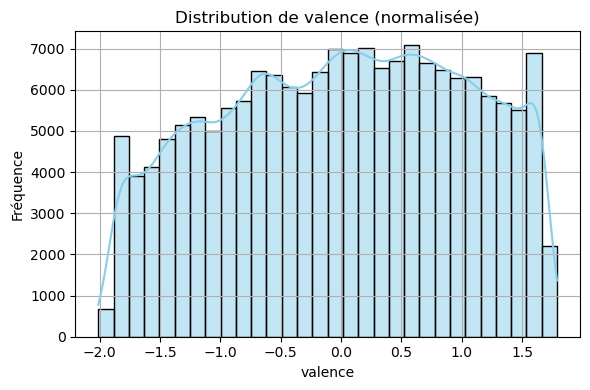

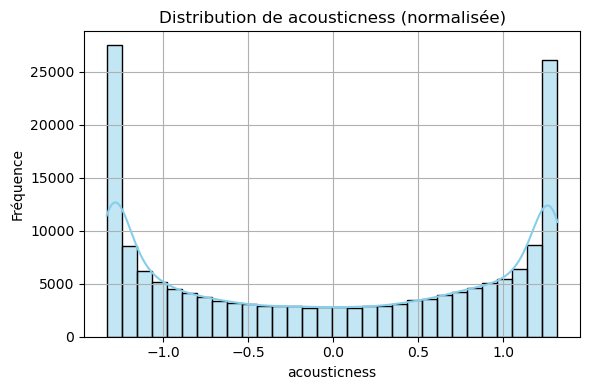

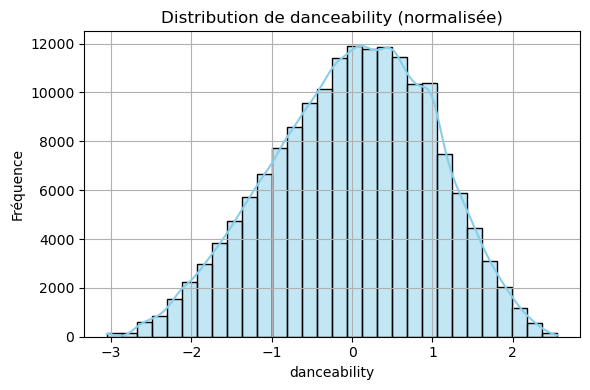

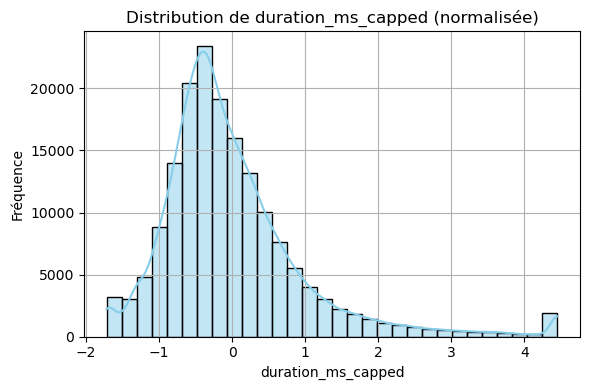

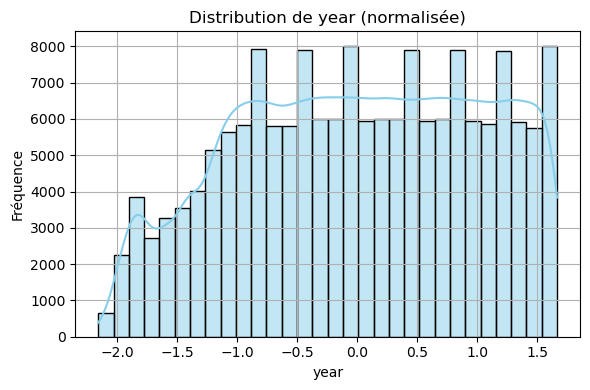

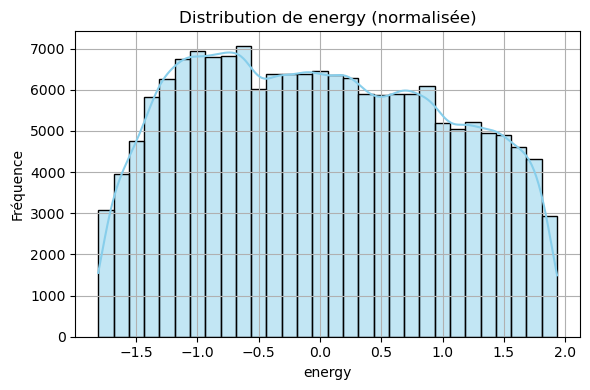

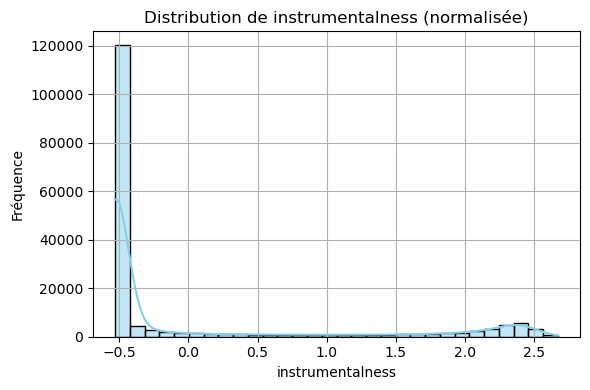

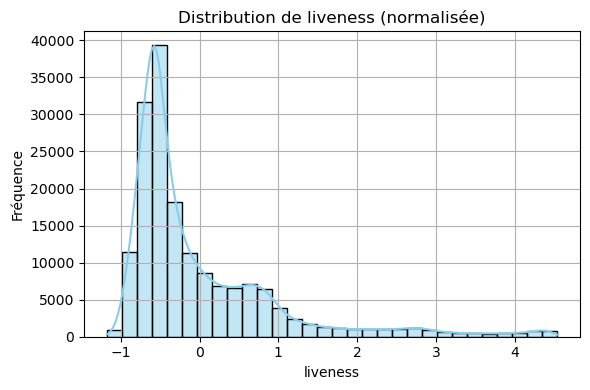

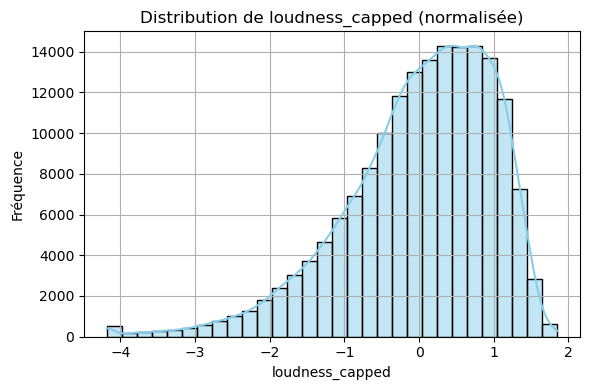

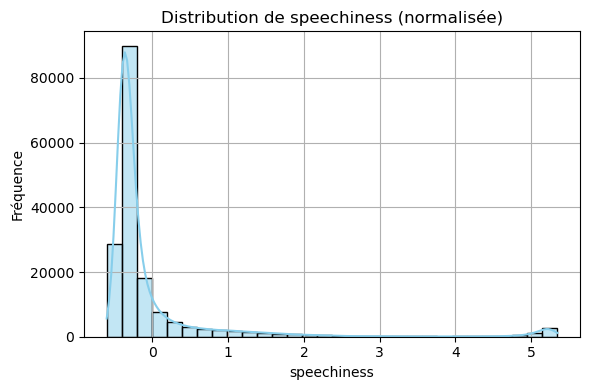

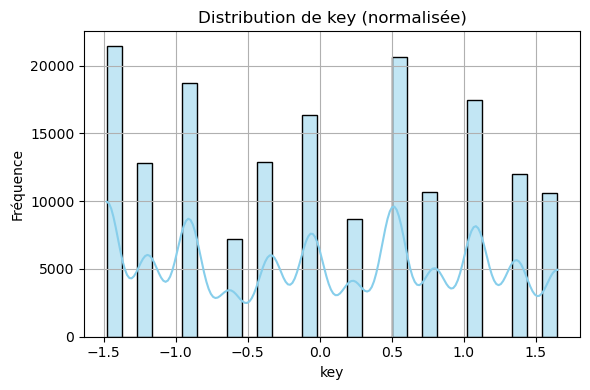

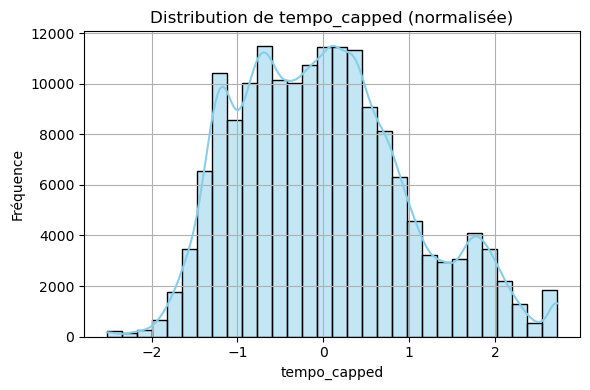

In [36]:
# Visualiser chaque distribution avec un histogramme
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_scaled[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col} (normalisée)')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

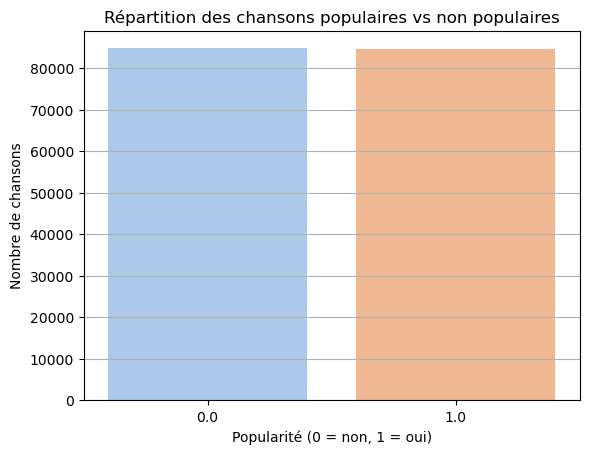

In [37]:
# un graphique de la colonne cible
sns.countplot(x='popularity_target', data=df_scaled, hue='popularity_target', palette='pastel', legend=False)
plt.title('Répartition des chansons populaires vs non populaires')
plt.xlabel('Popularité (0 = non, 1 = oui)')
plt.ylabel('Nombre de chansons')
plt.grid(axis='y')
plt.show()


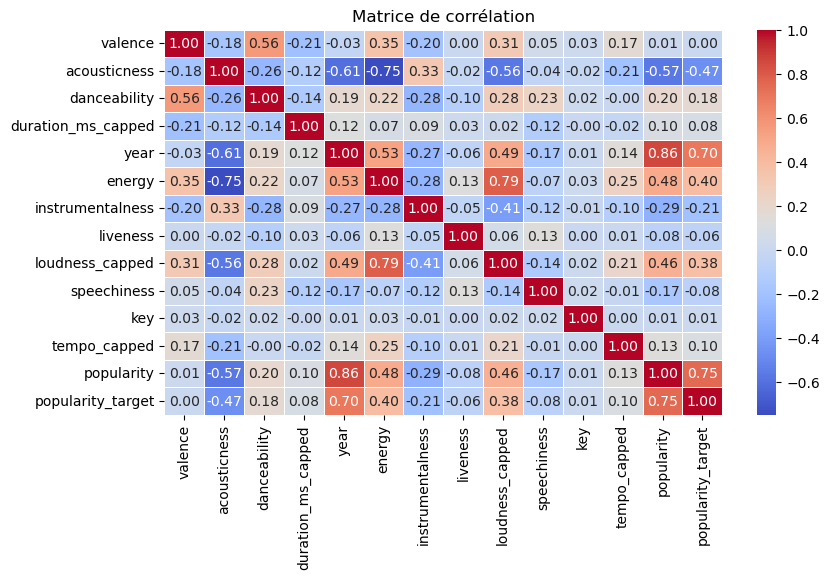

In [38]:
plt.figure(figsize=(9, 5))
corr = df_scaled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()


In [39]:
corr_target = df_scaled.corr()['popularity_target'].sort_values(ascending=False)
print(corr_target)


popularity_target     1.000000
popularity            0.748128
year                  0.697034
energy                0.396231
loudness_capped       0.376413
danceability          0.178143
tempo_capped          0.103877
duration_ms_capped    0.082372
key                   0.013493
valence               0.004251
liveness             -0.063282
speechiness          -0.075623
instrumentalness     -0.205050
acousticness         -0.469453
Name: popularity_target, dtype: float64


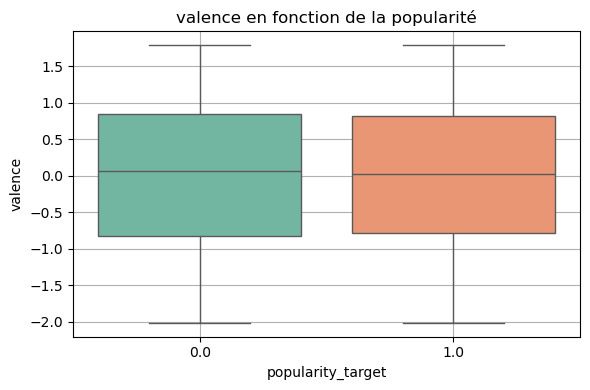

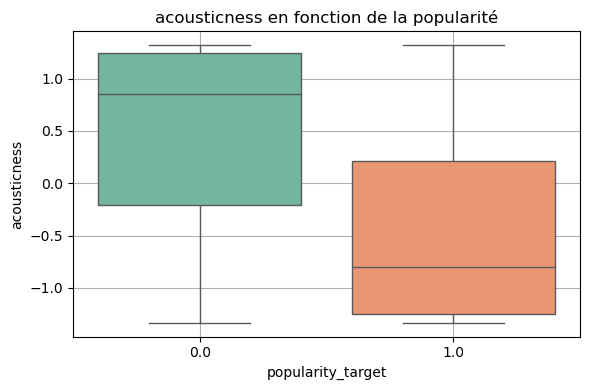

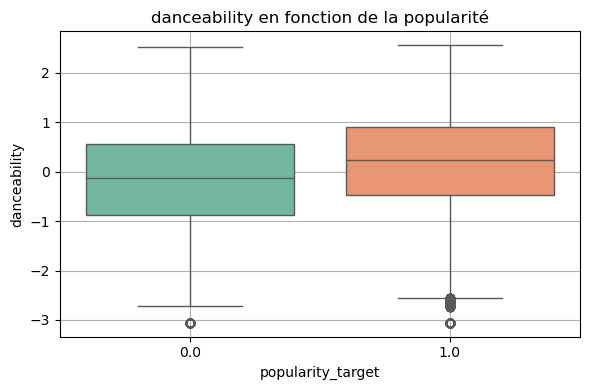

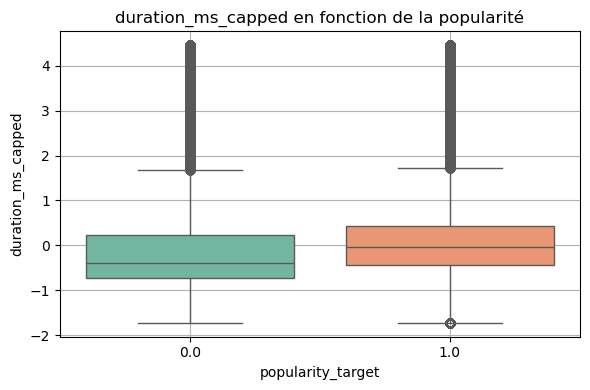

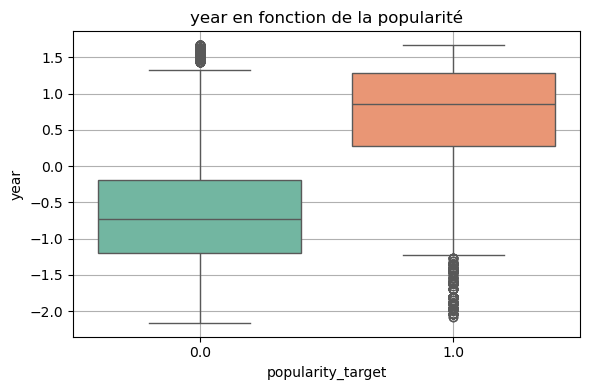

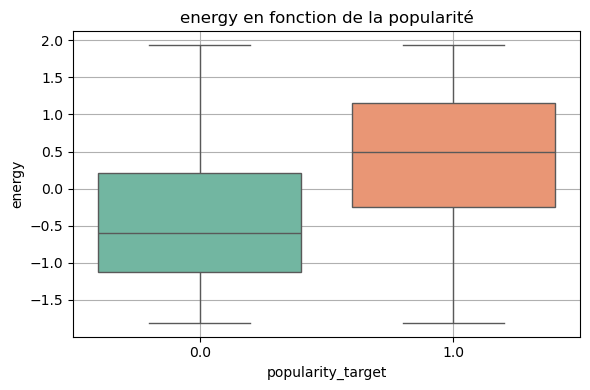

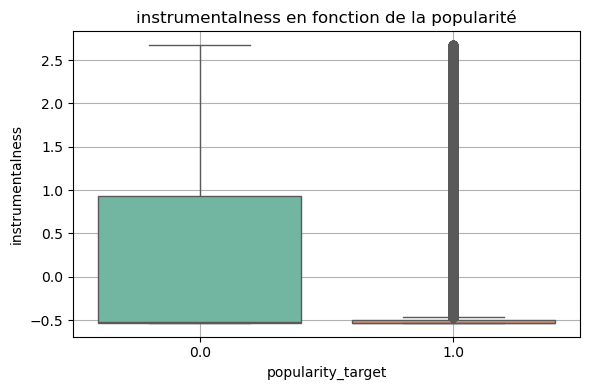

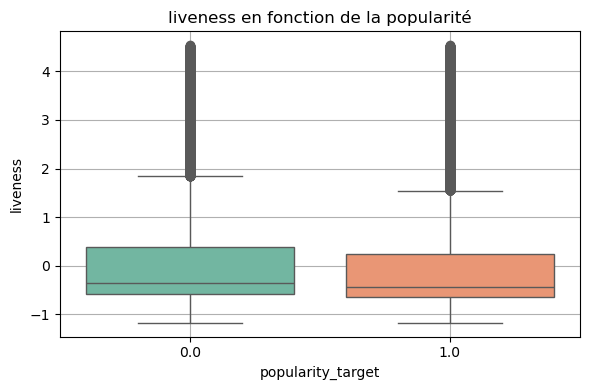

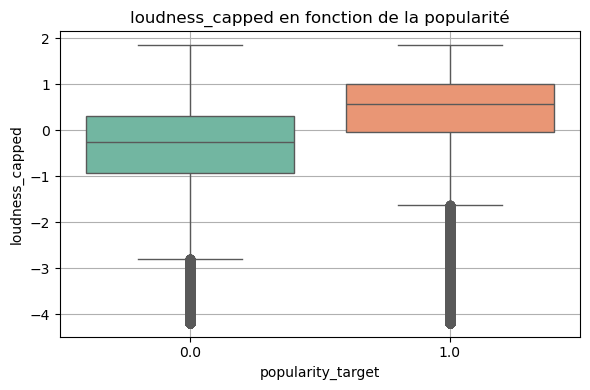

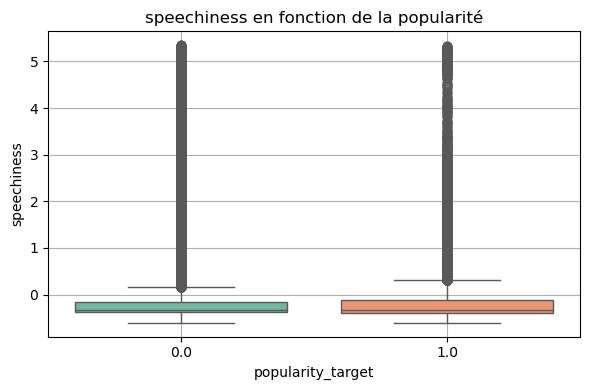

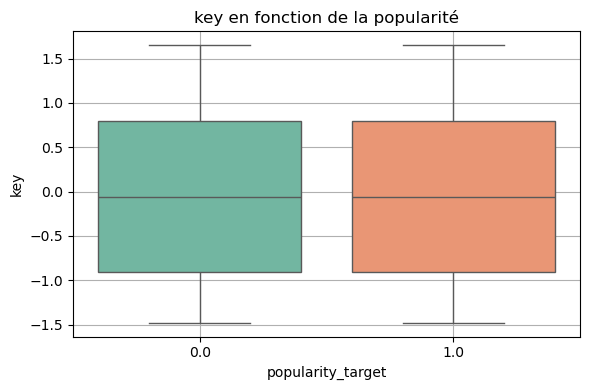

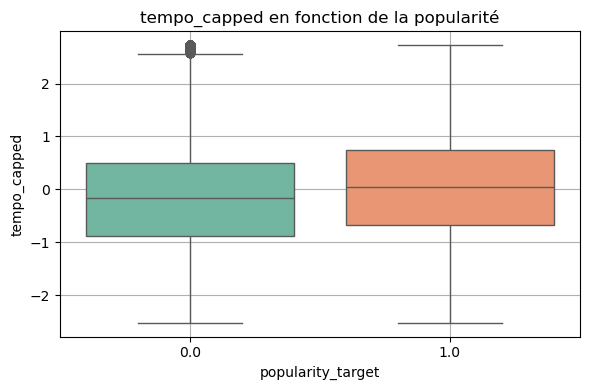

In [40]:
# Scatter plots avec la cible 
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='popularity_target', y=col, data=df_scaled, hue='popularity_target', palette='Set2', legend=False)
    plt.title(f'{col} en fonction de la popularité')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [41]:
df_scaled.duplicated().sum()

np.int64(85)

In [42]:
df = df.drop_duplicates()


In [43]:
X = df_scaled.drop(['popularity_target', 'popularity'], axis=1)
y = df_scaled['popularity_target']


In [44]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Création du modèle de régression logistique
model = LogisticRegression()
# Entraînement du modèle
model.fit(X_train, y_train)


LogisticRegression()

In [46]:
import joblib

# Sauvegarder les objets entraînés
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'logistic_model.pkl')

print("Sauvegarde réussie.")


Sauvegarde réussie.


In [47]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8256
Classification Report:
[[14026  2980]
 [ 2927 13946]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83     17006
         1.0       0.82      0.83      0.83     16873

    accuracy                           0.83     33879
   macro avg       0.83      0.83      0.83     33879
weighted avg       0.83      0.83      0.83     33879



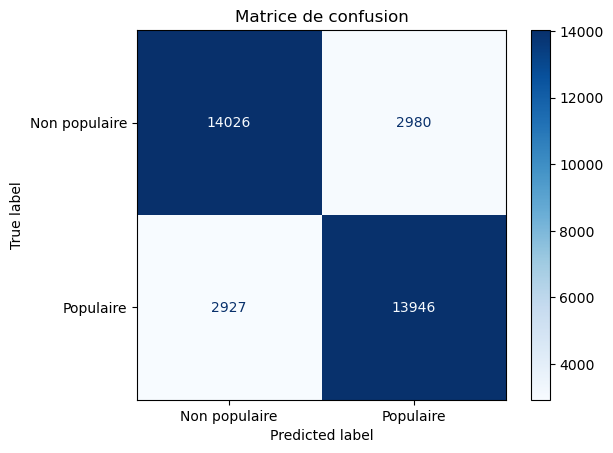

In [48]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non populaire", "Populaire"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de confusion')
plt.grid(False)
plt.show()


In [49]:
df_scaled.describe()

,valence,acousticness,danceability,duration_ms_capped,year,energy,instrumentalness,liveness,loudness_capped,speechiness,key,tempo_capped,popularity,popularity_target
count,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000,169393.000000
mean,0.000186,-0.002816,0.000595,0.000827,0.004127,0.002565,-0.001639,-0.000122,0.001985,-0.002250,0.000216,0.000788,31.634772,0.499478
std,0.999906,0.999468,0.999854,0.999343,0.998464,0.999921,0.998688,1.000237,0.999429,0.995128,0.999950,0.999945,21.743363,0.500001
min,-2.012636,-1.332909,-3.055785,-1.719833,-2.160485,-1.807133,-0.530427,-1.177384,-4.183080,-0.604571,-1.479239,-2.523024,0.000000,0.000000
25%,-0.803277,-1.066730,-0.692311,-0.597159,-0.807491,-0.846032,-0.530427,-0.613015,-0.555710,-0.390438,-0.910246,-0.767309,12.000000,0.000000
50%,0.040992,0.027268,0.057637,-0.208294,0.042963,-0.038258,-0.529764,-0.399732,0.156876,-0.328469,-0.056756,-0.068500,34.000000,0.000000
75%,0.828215,1.036088,0.745089,0.358385,0.854760,0.829351,-0.222049,0.315021,0.757798,-0.140719,0.796734,0.613935,48.000000,1.000000
max,1.790378,1.318238,2.557464,4.454459,1.666557,1.932560,2.671831,4.540644,1.852773,5.346958,1.650224,2.726732,100.000000,1.000000


In [50]:
def preprocess_new_song(song_input_raw):
    raw_columns = ['valence', 'acousticness', 'danceability', 'duration_ms',
                   'year', 'energy', 'instrumentalness', 'liveness',
                   'loudness', 'speechiness', 'key', 'tempo']
    
    df_new = pd.DataFrame(song_input_raw, columns=raw_columns)

    # Appliquer le capping
    df_new['duration_ms_capped'] = df_new['duration_ms'].clip(upper=658839.840000)
    df_new['loudness_capped'] = df_new['loudness'].clip(lower=-35)
    df_new['tempo_capped'] = df_new['tempo'].clip(upper=200)

    # Supprimer les colonnes brutes
    df_new = df_new.drop(['duration_ms', 'loudness', 'tempo'], axis=1)

    # Réorganiser l’ordre
    final_columns = ['valence', 'acousticness', 'danceability', 'duration_ms_capped',
                     'year', 'energy', 'instrumentalness', 'liveness',
                     'loudness_capped', 'speechiness', 'key', 'tempo_capped']
    
    # Normalisation avec le même scaler
    df_scaled = scaler.transform(df_new[final_columns])
    return pd.DataFrame(df_scaled, columns=final_columns)


In [51]:
# ---------------------------------------------------------
# Prédiction d'une nouvelle chanson – Instructions
# ---------------------------------------------------------
# Entrez ici les caractéristiques audio d'une chanson (valeurs brutes).
# ⚠️ IMPORTANT :
#    - Les valeurs doivent venir de la plage du dataset d'origine (avant normalisation).
#    - Le capping (durée, loudness, tempo) est automatiquement appliqué par le code.
#    - L'année (year) peut dépasser 2020, mais le modèle a été entraîné avec des années de 1921 à 2020.
#
# Plages recommandées (valeurs typiques du dataset original) :
#    - valence           : 0.0  – 1.0
#    - acousticness      : 0.0  – 0.996
#    - danceability      : 0.0  – 0.988
#    - duration_ms       : 5 108 – 5403500 
#    - year              : 1921 – 2020 
#    - energy            : 0.0  – 1.0
#    - instrumentalness  : 0.0  – 1.0
#    - liveness          : 0.0  – 1.0
#    - loudness          : -60.0 – 3.85  
#    - speechiness       : 0.00 – 0.97
#    - key               : entier entre 0 et 11
#    - tempo             : 0.0 – 243.5 
# Remarque : si vous dépassez ces valeurs, un capping automatique sera appliqué.
#
# Exemple :
#    manual_input = [[0.2, 0.95, 0.3, 400000, 2025, 0.2, 0.9, 0.5, -30, 0.04, 5, 120]]
#
# ---------------------------------------------------------


In [52]:
# Prediction sur une nouvelle chanson
manual_input = [[
    0.125,    # valence faible
    0.988,    # acousticness élevé
    0.29,    # danceability faible
    831667, # durée moyenne courte
    2022,    # année un peu plus proche de 2020
    0.0628,    # énergie faible
    0.867,   # instrumentalness élevé
    0.601,    # liveness élevé
   -35.624,   # loudness faible
    0.0366,  # speechiness élevée
    10,      # key
    77.783    # tempo lent
]]
# Appliquer le même prétraitement qu’en entraînement
manual_input_scaled_df = preprocess_new_song(manual_input)


In [53]:
prediction = model.predict(manual_input_scaled_df)
proba = model.predict_proba(manual_input_scaled_df)

print("Prédiction :", int(prediction[0])) # 1 pour populaire, 0 non populaire
print("Probabilité d'être populaire :", round(proba[0][1]*100, 2), "%")

Prédiction : 1
Probabilité d'être populaire : 92.68 %
